In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
print("All libraries have been Imported")

All libraries have been Imported


In [2]:
url = '../input/titanic/train.csv'
dft = pd.read_csv(url)
dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


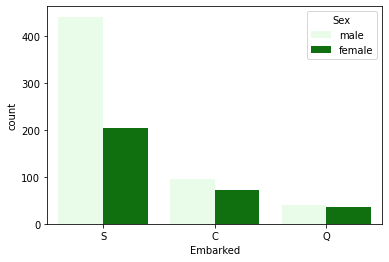

In [3]:
import seaborn as sns 
sns.countplot(x = 'Embarked', data = dft, hue = 'Sex', color = 'green')

In [4]:
dft["Age"]= dft["Age"].fillna(dft["Age"].mean())

In [5]:
dummy = pd.get_dummies(dft["Sex"])
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [6]:
dft2 = pd.concat((dft, dummy), axis=1)
dft2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [7]:
dft2.drop(["male"], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


In [8]:
dft2 = dft2.drop(["Sex"], axis =1)

In [9]:
dft2 = dft2.rename(columns={"female":"Sex"})

In [10]:
dft2 = dft2.drop(["male"], axis = 1)
dft2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
dft2["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
dft2["Embarked"].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [13]:
dummy2 = pd.get_dummies(dft2["Embarked"], prefix="Embarked").iloc[:,1:]
dummy2

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [14]:
dft2= dft2.drop(columns={"Embarked"})
dft2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0


In [15]:
dft2 = pd.concat((dft2,dummy2), axis =1)
dft2

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,1,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,0,0,0


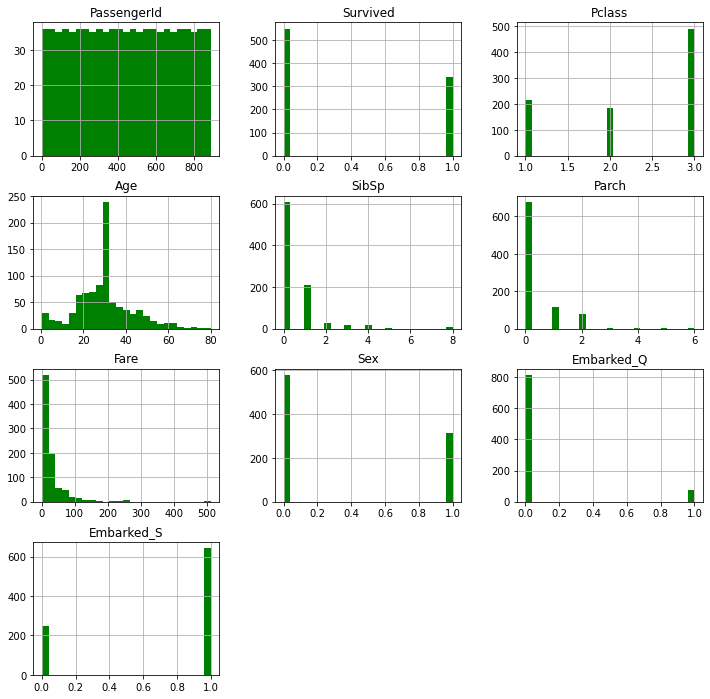

In [16]:
# Visualise the numerical values
dft2.hist(figsize=(12,12), color='green', bins=25)
plt.show()

* # **Now the Feature Engineering for Test Set**

In [17]:
url2 = '../input/titanic/test.csv'
dftest = pd.read_csv(url2)
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
print(dftest.shape)
print(dft2.shape)

(418, 11)
(891, 13)


In [19]:
dftest["Age"]= dftest["Age"].fillna(dftest["Age"].mean())

In [20]:
dummy3 = pd.get_dummies(dftest["Sex"])
dummy3.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [21]:
dftest = pd.concat((dftest, dummy3), axis=1)
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0


In [22]:
dftest.drop(["male"], axis = 1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,0


In [23]:
dftest = dftest.drop(["Sex"], axis =1)

In [24]:
dftest = dftest.rename(columns={"female":"Sex"})

In [25]:
dftest = dftest.drop(["male"], axis = 1)
dftest.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1


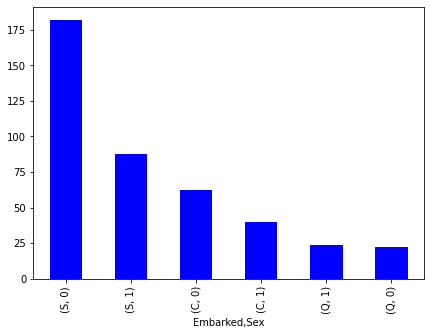

In [26]:
dftest[["Embarked","Sex"]].value_counts().plot(kind = 'bar',color = 'blue', figsize=(7,5))
plt.show()

In [27]:
dftest["Embarked"].isnull().value_counts()

False    418
Name: Embarked, dtype: int64

In [28]:
dummy4 = pd.get_dummies(dftest["Embarked"], prefix="Embarked").iloc[:,1:]
dummy4

,Embarked_Q,Embarked_S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [29]:
dftest= dftest.drop(columns={"Embarked"})
dftest.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1


In [30]:
dftest = pd.concat((dftest,dummy4), axis =1)
dftest

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1
416,1308,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,NaN,0,0,1


In [31]:
dft2.Fare.isnull().value_counts()

False    891
Name: Fare, dtype: int64

In [32]:
dftest["Fare"]= dftest["Fare"].fillna(dftest["Fare"].mean())

# ***Feature Scaling***

In [33]:
X = np.asarray(dft2[["Age", "Fare", "Sex","Pclass"]])
X[0:5]
y = np.asarray(dft2["Survived"])
y[0:5]

array([0, 1, 1, 1, 0])

In [34]:
X = preprocessing.StandardScaler(). fit(X).transform(X)
X[0:5]

array([[-0.5924806 , -0.50244517, -0.73769513,  0.82737724],
       [ 0.63878901,  0.78684529,  1.35557354, -1.56610693],
       [-0.2846632 , -0.48885426,  1.35557354,  0.82737724],
       [ 0.40792596,  0.42073024,  1.35557354, -1.56610693],
       [ 0.40792596, -0.48633742, -0.73769513,  0.82737724]])

In [35]:
X_train = X
y_train = y

# **Model: Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_train)
acc_log = round(LR.score(X_train, y_train) * 100, 2)
acc_log

80.02

# **Model: Linear Regression**

In [39]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()
LinR.fit(X_train, y_train)
y_pred = LinR.predict(X_train)
acc_lin = round(LR.score(X_train, y_train) * 100, 2)
acc_lin

80.02

# **Random Forest****

In [40]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_train)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

97.98

# Support Vector Machines

In [ ]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_train)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

# Which is the Best Model?

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Regression', 'Random Forrest', 'SVM'],
    'Score': [acc_log,acc_lin,acc_random_forest,acc_linear_svc]})
    
results_df = results.sort_values(by='Score', ascending = False)
results_df = results_df.set_index('Score')
results_df.head()

# Evlauating the Random Forest Through Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=15, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

# Checking the Importance of Features

In [ ]:
importances = pd.DataFrame({'feature':dft2[["Age", "Fare", "Sex","Pclass"]],'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(6)

In [ ]:
importances.plot.bar(color='green')

In [ ]:
print("oob score:", round(random_forest.oob_score, 4)*100, "%")

# We will proceed ahead with Random Forest Model for Testing phase

In [ ]:
X2 = np.asarray(dftest[["Age", "Fare", "Sex","Pclass"]])
X[0:5]

X2 = preprocessing.StandardScaler(). fit(X2).transform(X2)
X2[0:5]

X2_test = X2

In [ ]:
testPredictionsRF = random_forest.predict(X2_test)


In [ ]:
testPredictionsRF